As a video game lover, No Man's Sky was on my wishlist since it gave out its trailer. The producer *Hello Games* promised in this game there would be billions of planets with various species, climate and landscapes for players to explore. However, after August 9, 2016, players failed to get the experience *Hello Game* had promised, only to found billions of boring planets because the content are repetitive. The lack of features and poor graphic capabilities brought massive critics. That was why I sold my PS4 version game on eBay only after one week of its launch.

However, *Hello Games* didn't give up on this game. They tried hard to bring back what they had promised. After a few updates, players found that this game kept improving, and became enjoyable. 

When I saw all the news about No Man's Sky's improvement, I was curious about what has changed about how people viewing it. In this notebook, I will collect all the reviews on steam to look for an answer.

![](nomansky.jpg)

In [58]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import re

#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud,STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


from sklearn.pipeline import Pipeline


### Data processing

In [140]:
reviews=pd.read_csv('No Mans Sky.csv')
reviews.head()

,user,playtime,user_link,post_date,helpfulness,review,recommend
0,Eisen,94.6,https://steamcommunity.com/id/p0rtalGeek/,Posted: January 4,288,No Man's Sky is an...interesting situation.\nF...,Recommended
1,Scorpi,48.7,https://steamcommunity.com/profiles/7656119812...,"Posted: August 7, 2018",649,"For many years, (I am 64), I have played space...",Recommended
2,rayculz,71.1,https://steamcommunity.com/id/rayculz/,"Posted: November 21, 2018","2,095",I remember in 2016 when I've pre-ordered this ...,Recommended
3,rexwood05,74.2,https://steamcommunity.com/id/Erris/,"Posted: August 24, 2016","3,428",(Updated at bottom)\nIt doesn't actually feel ...,Not Recommended
4,Gamekeeper,117.8,https://steamcommunity.com/profiles/7656119805...,"Posted: July 24, 2018","10,873",Honestly not a bad game. at launch it was a li...,Recommended


In [141]:
def data_prepare(data):
    data['date'] = data['post_date'].apply(lambda x: ' '.join(x.split(' ')[1:])+', 2019' if len(x.split(' ')) < 4
                                                                  else ' '.join(x.split(' ')[1:]))
    # extract date from string
    
    data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').strftime('%Y-%m-%d'))
    
    data['date'] = pd.to_datetime(data['date'])
    
    data['helpfulness'] = data['helpfulness'].apply(lambda x: int(x.replace(',',''))) 
    #convert string to int by removing comma
    
    data['playtime'] = data['playtime'].apply(lambda x: float(x.replace(',','')) if pd.notnull(x) else 0)
    
    data['target'] = [1 if x=='Recommended' else 0 for x in data['recommend']]
    
    data['review_type'] = data['target'].apply(lambda x: 'Positive' if x==1 else 'Negative')
    
    data['review_length'] = [len(x.split()) for x in data['review']]
    
#     tokenizer = RegexpTokenizer(r'[\w\']+')         
    
#     data['clean_review'] = [' '.join(re.findall(r'[\w\']+',x)) for x in reviews['review']]
    
    STOPWORDS.update(['man','man\'s','sky','even','now','one','hello','game','games','thing'])
    data['clean_review'] = [' '.join([word for word in re.findall(r'[\w\']+',x.lower()) if word not in STOPWORDS]) 
                            for x in data['review']]
    # remove all punctuations and symbols such as ♥ (used to censor Profanity/Swear) 
    # and other symbols people use to make drawings in comment

In [162]:
' '.join(re.findall(r'[\w\']+',reviews.review[0]))

"No Man's Sky is an interesting situation First impressions are everything for a game and No Man's Sky gave quite a first impression for sure Pre launch No Man's Sky promised to be the game literally everybody dreams about Touting quintillions of planets each randomly generated and different from the last with random creatures plants and geology No Man's Sky was looking too good to be true and that was absolutely the case at launch Nearly every feature advertised in the trailers interviews and pre launch material was missing Instead there was a boring husk of a game with boring planets and same y fauna Then there was the first major patch Foundation Foundation added basebuilding similar to subnautica a survival mode farming freighters and a whole host of quality of life improvements Then there was the second patch Pathfinder Pathfinder added vehicles base sharing permadeath mode more starships new shops and even more content The game was still early but the groundwork was there The Atl

In [163]:
reviews.review[0]

"No Man's Sky is an...interesting situation.\nFirst impressions are everything for a game, and No Man's Sky gave quite a first impression for sure. Pre-launch, No Man's Sky promised to be the game literally everybody dreams about. Touting quintillions of planets, each randomly generated and different from the last, with random creatures, plants, and geology. No Man's Sky was looking too good to be true, and that was absolutely the case at launch.\nNearly every feature advertised in the trailers, interviews, and pre-launch material was missing. Instead, there was a boring husk of a game, with boring planets and same-y fauna.\nThen there was the first major patch - Foundation. Foundation added basebuilding similar to subnautica, a survival mode, farming, freighters, and a whole host of quality of life improvements\nThen there was the second patch - Pathfinder. Pathfinder added vehicles, base sharing, permadeath mode, more starships, new shops, and even more content. The game was still ea

In [142]:
data_prepare(reviews)
reviews.head()

,user,playtime,user_link,post_date,helpfulness,review,recommend,date,target,review_type,review_length,clean_review
0,Eisen,94.6,https://steamcommunity.com/id/p0rtalGeek/,Posted: January 4,288,No Man's Sky is an...interesting situation.\nF...,Recommended,2019-01-04,1,Positive,361,interesting situation first impressions everyt...
1,Scorpi,48.7,https://steamcommunity.com/profiles/7656119812...,"Posted: August 7, 2018",649,"For many years, (I am 64), I have played space...",Recommended,2018-08-07,1,Positive,105,many years 64 played space exploration coloniz...
2,rayculz,71.1,https://steamcommunity.com/id/rayculz/,"Posted: November 21, 2018",2095,I remember in 2016 when I've pre-ordered this ...,Recommended,2018-11-21,1,Positive,159,remember 2016 pre ordered hype train obsession...
3,rexwood05,74.2,https://steamcommunity.com/id/Erris/,"Posted: August 24, 2016",3428,(Updated at bottom)\nIt doesn't actually feel ...,Not Recommended,2016-08-24,0,Negative,1405,updated bottom actually feel real universe pla...
4,Gamekeeper,117.8,https://steamcommunity.com/profiles/7656119805...,"Posted: July 24, 2018",10873,Honestly not a bad game. at launch it was a li...,Recommended,2018-07-24,1,Positive,118,honestly bad launch little barren still kinda ...


### Analysis

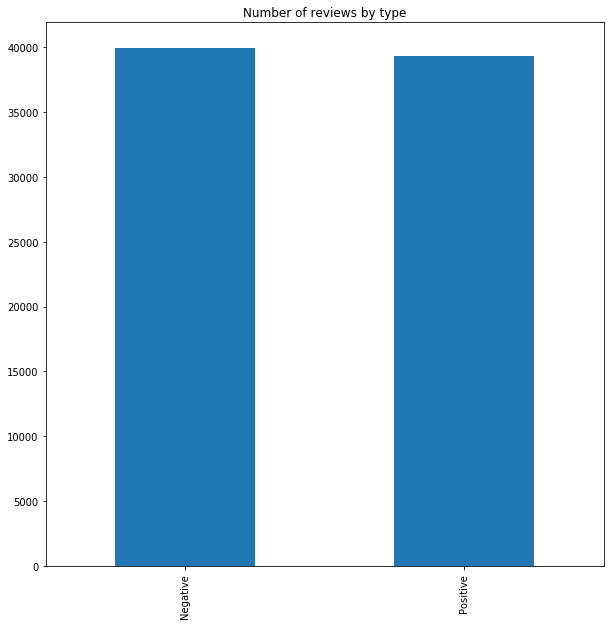

In [65]:
reviews['review_type'].value_counts().plot.bar(title='Number of reviews by type')

The number of reviews of each type is close, so this data set is balanced.

In [18]:
review_count=reviews.groupby(reviews['date'].dt.to_period("M")).review_type.value_counts()

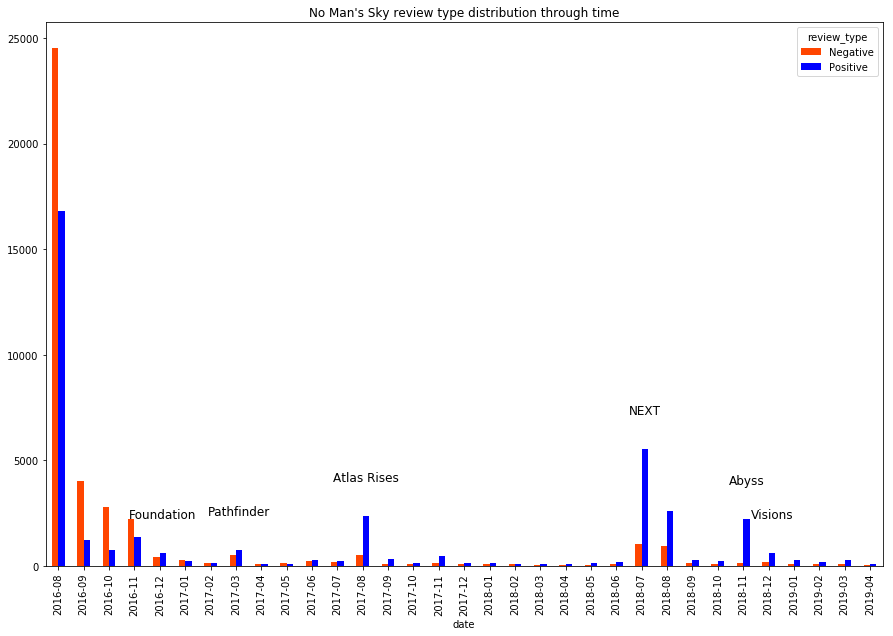

In [116]:
fig, ax = plt.subplots(figsize=(15,10))
review_count.unstack().plot.bar(figsize=(15,10),color=['orangered','b'],
                                title='No Man\'s Sky review type distribution through time',ax=ax)
update=['Foundation','Pathfinder','Atlas Rises','NEXT','Abyss','Visions']

rects=ax.patches
bar=[4,7,12,23,27,28]
for i, label in zip(bar,update):
    ax.text(rects[i+33].get_x()+rects[i+33].get_width()/2,rects[i+33].get_height()+1500,label,
            ha='center', va='bottom', fontsize=12)

The bar plot clearly shows how players' views of No Man's Sky change through time. There are massive negative voices upon it launched on August 8, 2016. The number of negative reviews were still way bigger than the number of positive ones from September to November 2016. At the same time, the total number of reviews decreased dramatically, comparing to August. This maybe because many players quitted at the first place.

Things changed beginning from December 2016. As we can see more positive reviews appeared in each month. During some months there were even large increase of positive review numbers. These months related to six major updates Hello Games released. Let's take a look at the timeline:

* Foundation update: November 26, 2016
* Pathfinder update: March 8, 2017
* Atlas Rises update: August 11, 2017
* NEXT update: July 24, 2018
* Abyss update: October 29, 2018
* Visions update: November 22, 2018

These dates perfectly explain the big increase of positive reviews.

#### Now let's learn players' review behavior

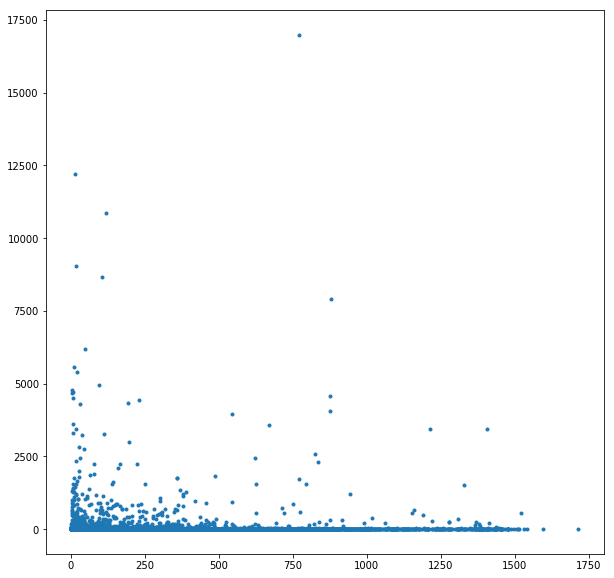

In [9]:
#plt.figure(figsize=(10,10))

plt.plot(reviews['review_length'],reviews['helpfulness'],'.')

The `helpfulness` featuren is the number of people think the review is helpful. It seems like there is no correlation between length of review and helpfulness

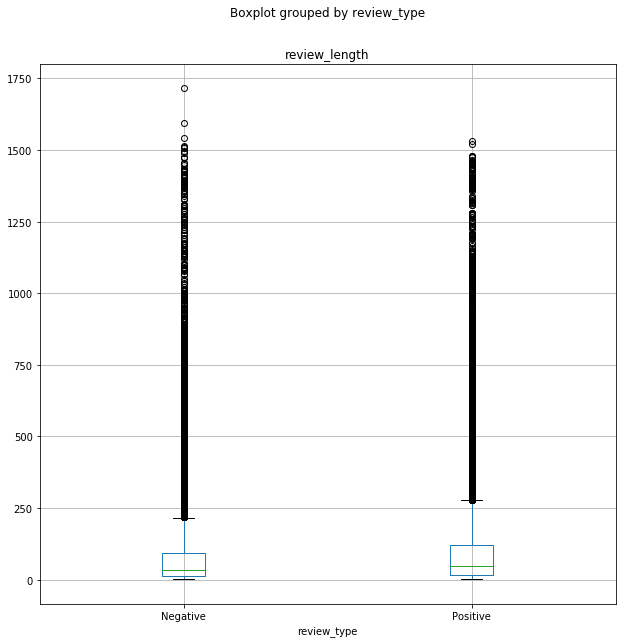

In [10]:
reviews.boxplot('review_length',by='review_type')

Players who like the game seem to be willing to write longer reviews. They enjoy the game and want to try their best to introduce it to others. On the other hand, players who don't like the game don't want to waste more time writing comments.

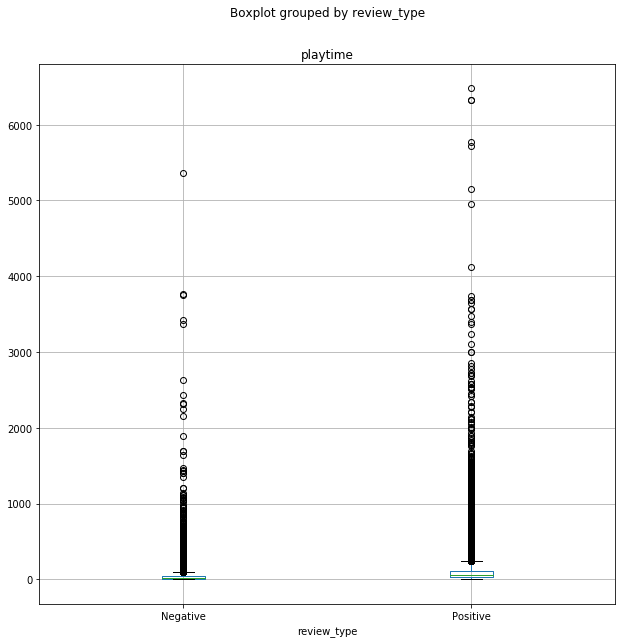

In [118]:
reviews.boxplot('playtime',by='review_type')

As expected, players who like the game spend much more time playing it than those who dislike it.

### Review content

#### all reviews

In [126]:
allwords=[x for x in reviews['clean_review']]
allwords=' '.join(allwords)

(-0.5, 799.5, 499.5, -0.5)

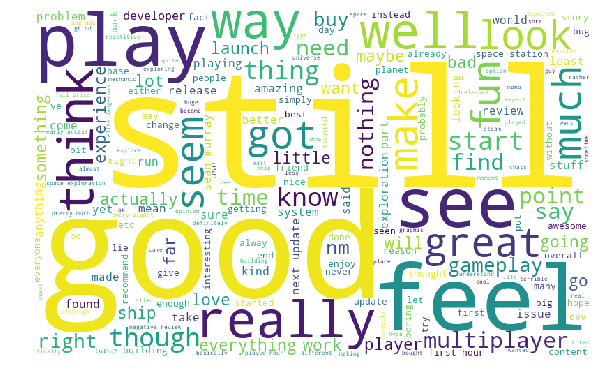

In [127]:
#STOPWORDS.update(['man','man\'s','sky','even','now','one','hello','game','thing'])
wordcloud = WordCloud(width=800, height=500,stopwords=STOPWORDS,background_color='white').generate(allwords.lower())
plt.imshow(wordcloud)
plt.axis('off')


I use wordcloud to generate the most important words that are in the reviews. Although there are more negative reviews, the plot gives positive feedback for a first look. The most important word is "still". This might indicates how people feel about this game: incompleted.

It is better to look into each review type explicitly.

#### Negative reviews

In [119]:
negwords=[x for x in reviews[reviews['target']==0]['clean_review']]
negwords=' '.join(negwords)

(-0.5, 799.5, 499.5, -0.5)

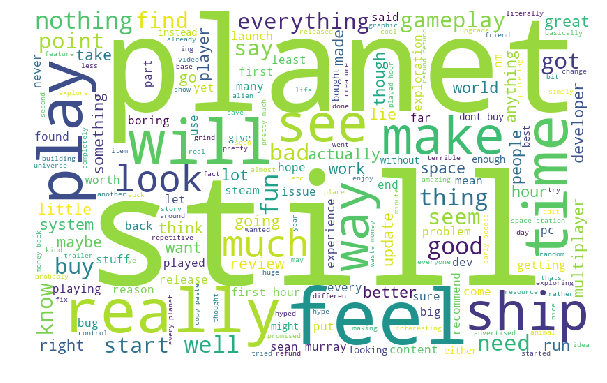

In [120]:
wordcloud_neg = WordCloud(width=800, height=500,background_color='white').generate(negwords.lower())
plt.imshow(wordcloud_neg)
plt.axis('off')

# wordcloud_neg.words_

The negative reviews mainly focus on the content of the game such as "planet", "space". Many critics are about the boring contens.

#### Positive reviews

In [121]:
poswords=[x for x in reviews[reviews['target']==1]['clean_review']]
poswords=' '.join(poswords)

(-0.5, 799.5, 499.5, -0.5)

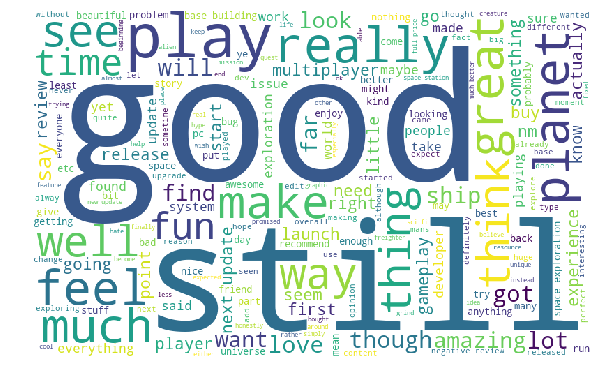

In [122]:
wordcloud_pos = WordCloud(width=800, height=500,background_color='white').generate(poswords.lower())
plt.imshow(wordcloud_pos)
plt.axis('off')

The supports of No Man's Sky think the game is fun. We can see "update", especially "next update" plays a key role. Hello Games did a great job to save this game.

#### Negative reviews before updates

In [138]:
negwords2=[x for x in reviews[(reviews['date']<'2016-11-26') & (reviews['target']==0)]['clean_review']]
negwords2=' '.join(negwords2)

(-0.5, 799.5, 499.5, -0.5)

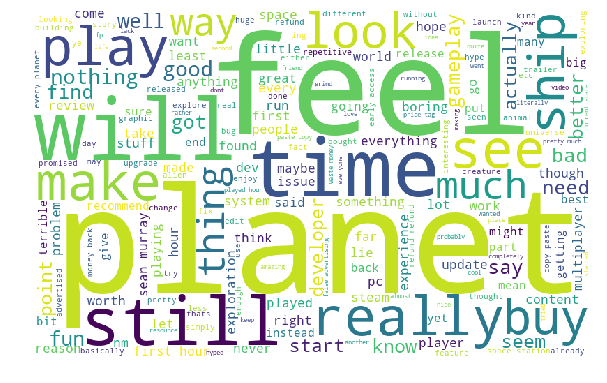

In [139]:
wordcloud_neg2 = WordCloud(width=800, height=500,background_color='white').generate(negwords2.lower())
plt.imshow(wordcloud_neg2)
plt.axis('off')

The negative reviews before any updates were harsher. Moreover, "still" is less important here. This indicates that critics after the release of updates believe the game was not good enough yet, which could be a greate motivation for Hello Games to improve.

### Sentiment Analysis

In [143]:
X_train, X_test, y_train, y_test = train_test_split(reviews['clean_review'], reviews['target'].values, 
                                                    test_size=0.3, random_state=33)

#### A pipeline for Naive Bayes classifier with tf-idf 

In [146]:
def stem(text):
    stemmer = PorterStemmer().stem
    return [stemmer(word) for word in word_tokenize(text)]

In [40]:
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english',tokenizer=stem,min_df=10,max_df=1.0,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [42]:
text_clf.fit(X_train,y_train)
pred=text_clf.predict(X_test)
text_clf.score(X_test,y_test)

0.877345788100648

It achieves accuracy of 87.7%, which is good. Let's see if we can improve using Logistic Regression.

#### Logistic Regression with Bag of Words

In [147]:
vectorizer = CountVectorizer(stop_words='english',tokenizer=stem,min_df=10,max_df=1.0,ngram_range=(1,2))
bow_train=vectorizer.fit_transform(X_train)
bow_test=vectorizer.transform(X_test)

C:\Users\xiaogaga\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  's

In [148]:
bow_train

<55453x31341 sparse matrix of type '<class 'numpy.int64'>'
	with 2362779 stored elements in Compressed Sparse Row format>

In [149]:
model = LogisticRegression(random_state=0)
model.fit(bow_train,y_train)

pred=model.predict(bow_test)
model.score(bow_test,y_test)

C:\Users\xiaogaga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8708238660270975

In [150]:
model.score(bow_train,y_train)

0.9524281824247561

In [151]:
confusion_matrix(y_test,pred)

array([[10612,  1360],
       [ 1710, 10084]], dtype=int64)

It achieves 87% on test data, but 95% on train data, so there may be underfitting.

#### Logistic Regression with tf-idf

In [152]:
transformer = TfidfTransformer()
tf_train = transformer.fit_transform(bow_train)
tf_test = transformer.transform(bow_test)

In [153]:
model = LogisticRegression(random_state=0)
model.fit(tf_train,y_train)

pred=model.predict(tf_test)
model.score(tf_test,y_test)

0.8826474795926954

In [154]:
model.score(tf_train,y_train)

0.9072187257677673

In [156]:
confusion_matrix(y_test,pred)

array([[10683,  1289],
       [ 1500, 10294]], dtype=int64)

It achieves 88.2% which is a increase.